# LGBM & XGBM on titanic test data

In [1]:
## since we do not have survived column in this dataset, we will consider sex column as target

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis (EDA) and Data Preprocessing

In [3]:
data=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\15 XGBM & LGBM\Titanic_test.csv')

In [4]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
data.drop(['Name','PassengerId'],axis=1,inplace=True)

In [6]:
data.shape

(418, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Cabin     91 non-null     object 
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


In [8]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
data.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [10]:
## We have null values in Age, Fare, and Cabin columns. Since this a comparatively small dataset we will replace
## null values with median and mode respectively instead of dropping so as to avoid loss of data

In [11]:
median_age=data['Age'].median()
median_age

27.0

In [12]:
data['Age']=data['Age'].fillna(median_age)

In [13]:
median_fare=data['Fare'].median()
median_fare

14.4542

In [14]:
data['Fare']=data['Fare'].fillna(median_fare)

In [15]:
mode_cabin=data['Cabin'].mode()
mode_cabin

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [16]:
data['Cabin']=data['Cabin'].fillna(mode_cabin[0])

In [17]:
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [18]:
data.duplicated().any()

True

In [19]:
data[data.duplicated()]

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,3,male,27.0,2,0,2662,21.6792,B57 B59 B63 B66,C


In [20]:
data.drop_duplicates(inplace=True)

In [21]:
data.duplicated().any()

False

In [22]:
## dataset is now free from null values and duplicate rows

In [23]:
## first we define numerical colums
num_col=[i for i in data.columns if data[i].dtypes!='O']
num_col

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

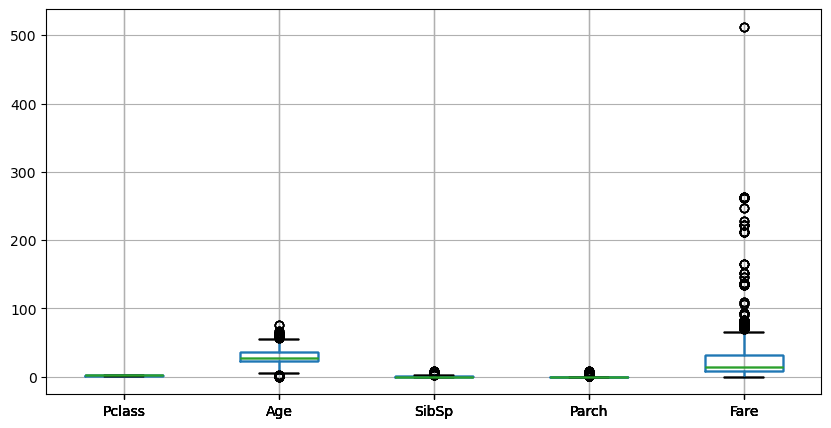

In [24]:
## we can draw boxplot to check for the outliers
for i in num_col:
    data.boxplot(column=num_col,figsize=(10,5))
plt.show();

In [25]:
## boxplot shows maximum outliers in Age and Fare columns however given this is a detail of paggenger in a ship, their extreme age and ticket fare
## may not be an outlier in the data. Hence we decide not to remove outliers.

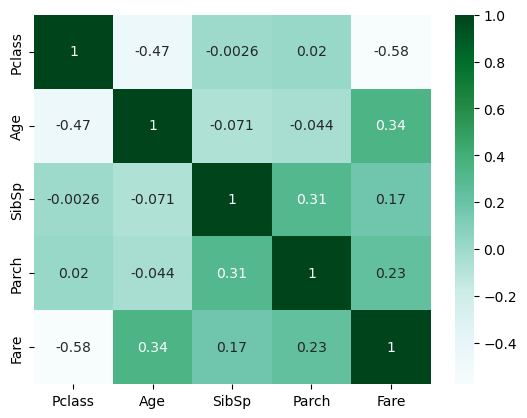

In [26]:
sns.heatmap(data[num_col].corr(),annot=True,cmap='BuGn')
plt.show();

In [27]:
## There doesn't seem to be much correlation between features and target

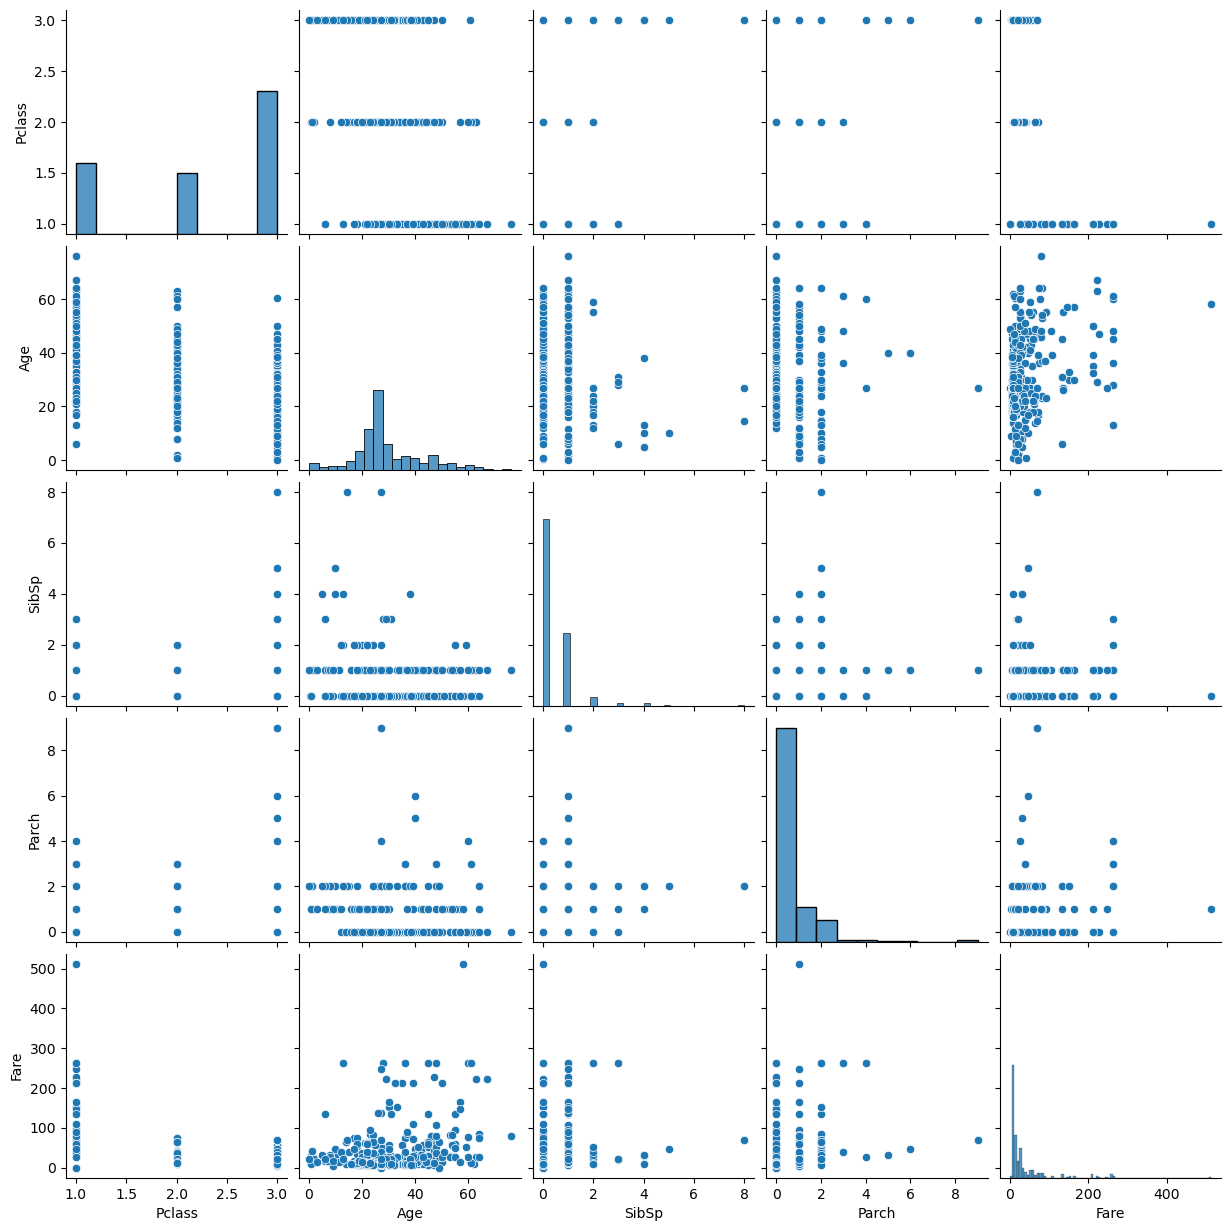

In [28]:
sns.pairplot(data[num_col])
plt.show();

In [29]:
## standardizing the data

In [30]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

In [31]:
std_sca=StandardScaler()
ord_enc=OrdinalEncoder()

In [32]:
target=data[['Sex']]

In [33]:
target=ord_enc.fit_transform(target)

In [34]:
target

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [36]:
ticket=['Ticket']
cabin=['Cabin']
embarked=['Embarked']
age=['Age']
sibsp=['SibSp']
parch=['Parch']
fare=['Fare']
pclass=['Pclass']

In [37]:
transformer=ColumnTransformer([('ord1',ord_enc,ticket),('ord2',ord_enc,cabin),('ord3',ord_enc,embarked),('std1',std_sca,age),('std2',std_sca,sibsp),('std3',std_sca,parch),('std4',std_sca,fare),('std5',std_sca,pclass)])

In [38]:
features=pd.DataFrame(transformer.fit_transform(data),columns=transformer.get_feature_names_out())

In [39]:
features

,ord1__Ticket,ord2__Cabin,ord3__Embarked,std1__Age,std2__SibSp,std3__Parch,std4__Fare,std5__Pclass
0,152.0,15.0,1.0,0.385297,-0.496512,-0.400804,-0.497452,0.875330
1,221.0,15.0,2.0,1.369307,0.622653,-0.400804,-0.512300,0.875330
2,73.0,15.0,1.0,2.550118,-0.496512,-0.400804,-0.464176,-0.313636
3,147.0,15.0,2.0,-0.205108,-0.496512,-0.400804,-0.482530,0.875330
4,138.0,15.0,2.0,-0.598712,0.622653,0.618314,-0.417620,0.875330
...,...,...,...,...,...,...,...,...
412,267.0,15.0,2.0,-0.205108,-0.496512,-0.400804,-0.493498,0.875330
413,324.0,22.0,0.0,0.739541,-0.496512,-0.400804,1.312363,-1.502602
414,346.0,15.0,2.0,0.700181,-0.496512,-0.400804,-0.507823,0.875330
415,220.0,15.0,2.0,-0.205108,-0.496512,-0.400804,-0.493498,0.875330


In [40]:
features.shape

(417, 8)

In [41]:
target.shape

(417, 1)

In [42]:
## features and target is ready for processing

## Building Predictive Models & Comparative Analysis

### XGBM

In [43]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [44]:
!pip install Xgboost

In [45]:
import xgboost as xgb

In [46]:
## train test split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [47]:
## we already identified best parameters while working on titanic train dataset, hence we will use the same parameters

In [48]:
xgb=xgb.XGBClassifier(n_estimator=100,learning_rate=0.3,gamma=0,reg_lambda=1,min_child_weight=1)

In [49]:
xgb.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:15:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=100, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [51]:
y_pred_xg=xgb.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred_xg)

0.5595238095238095

In [53]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

         0.0       0.40      0.31      0.35        32
         1.0       0.63      0.71      0.67        52

    accuracy                           0.56        84
   macro avg       0.51      0.51      0.51        84
weighted avg       0.54      0.56      0.55        84



In [54]:
## Accuracy is 56%, F1 score is 35% for class 0 and 67% for class 1

In [55]:
## we will now check training validation
y_pred_xg_train=xgb.predict(x_train)
accuracy_score(y_train,y_pred_xg_train)

0.9819819819819819

In [56]:
print(classification_report(y_train,y_pred_xg_train))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       120
         1.0       0.98      1.00      0.99       213

    accuracy                           0.98       333
   macro avg       0.98      0.98      0.98       333
weighted avg       0.98      0.98      0.98       333



In [57]:
## model performing exceptionally well in training but not in testing shows model is overfit. Class imbalance may be the reason.
## we will try to use random over sampler

In [58]:
from imblearn.over_sampling import RandomOverSampler

In [59]:
over_sam=RandomOverSampler()

In [60]:
features,target=over_sam.fit_resample(features,target)

In [63]:
target

array([1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0.

In [66]:
np.unique(target,return_counts=True)

(array([0., 1.]), array([265, 265], dtype=int64))

In [69]:
print(target.shape)
print(features.shape)

(530,)
(530, 8)


In [70]:
## now we have a balance dataset

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [73]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(424, 8)
(424,)
(106, 8)
(106,)


In [74]:
import xgboost as xgb1

In [75]:
xgb1=xgb1.XGBClassifier(n_estimator=100,learning_rate=0.3,gamma=0,reg_lambda=1,min_child_weight=1)

In [76]:
xgb1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=100, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [77]:
y_pred_xg1=xgb1.predict(x_test)

In [78]:
accuracy_score(y_test,y_pred_xg1)

0.6981132075471698

In [79]:
print(classification_report(y_test,y_pred_xg1))

              precision    recall  f1-score   support

         0.0       0.67      0.81      0.73        54
         1.0       0.75      0.58      0.65        52

    accuracy                           0.70       106
   macro avg       0.71      0.70      0.69       106
weighted avg       0.71      0.70      0.69       106



In [80]:
## we see that the model has given better results after applying random over sample

In [81]:
## we will now check training validation
y_pred_xg1_train=xgb1.predict(x_train)
accuracy_score(y_train,y_pred_xg1_train)

0.9787735849056604

In [82]:
print(classification_report(y_train,y_pred_xg1_train))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       211
         1.0       0.99      0.97      0.98       213

    accuracy                           0.98       424
   macro avg       0.98      0.98      0.98       424
weighted avg       0.98      0.98      0.98       424



In [83]:
## with XGBM we are able to achieve 70% accuracy with F1 score as 73% and 65% for class 0 and 1 respectively

### LGBM

In [84]:
!pip install lightgbm

In [85]:
import lightgbm as lgb

In [86]:
lgb=lgb.LGBMClassifier(n_estimators=100,max_depth=3,max_bin=10,boosting_type='gbdt',top_rate=0.3,other_rate=0.2,data_sample_strategy='goss')

In [87]:
lgb.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 213, number of negative: 211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 61
[LightGBM] [Info] Number of data points in the train set: 424, number of used features: 8
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502358 -> initscore=0.009434
[LightGBM] [Info] Start training from score 0.009434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

LGBMClassifier(data_sample_strategy='goss', max_bin=10, max_depth=3,
               other_rate=0.2, top_rate=0.3)

In [88]:
y_pred_lg=lgb.predict(x_test)

In [89]:
accuracy_score(y_test,y_pred_lg)

0.6132075471698113

In [90]:
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

         0.0       0.61      0.69      0.64        54
         1.0       0.62      0.54      0.58        52

    accuracy                           0.61       106
   macro avg       0.61      0.61      0.61       106
weighted avg       0.61      0.61      0.61       106



In [91]:
## we will now check training validation
y_pred_lg_train=lgb.predict(x_train)
accuracy_score(y_train,y_pred_lg_train)

0.7665094339622641

In [92]:
## with LGBM we achieved 61% accuracy with F1 score 64% and 58% for class 0 and 1 respectively, however training accuracy is 77%.
## though the model has not performed as good as XGBM, but the model is not overfit.
## we can conclude that XGBM model is giving better results.